<a href="https://colab.research.google.com/github/Zzl85199/LondonBikeJourney/blob/main/LondonBikeJourney.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
bike_data = pd.read_csv('/content/drive/My Drive/Kaggle/LondonBikeJourney.csv', encoding='ISO-8859-1')

In [ ]:
# Display the structure of the dataset
print("Data Structure:")
print(bike_data.info())

# Display the first few rows of the dataset to understand the data better
print("\nFirst few rows of the dataset:")
print(bike_data.head())

Data Structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776527 entries, 0 to 776526
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Number                776527 non-null  int64 
 1   Start date            776527 non-null  object
 2   Start station number  776527 non-null  int64 
 3   Start station         776527 non-null  object
 4   End date              776527 non-null  object
 5   End station number    776527 non-null  int64 
 6   End station           776527 non-null  object
 7   Bike number           776527 non-null  int64 
 8   Bike model            776527 non-null  object
 9   Total duration        776527 non-null  object
 10  Total duration (ms)   776527 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 65.2+ MB
None

First few rows of the dataset:
      Number     Start date  Start station number  \
0  132825189  8/1/2023 0:00                  1190   
1  132825190  8/

In [ ]:
# Convert 'Start date' and 'End date' to datetime format
bike_data['Start date'] = pd.to_datetime(bike_data['Start date'], format='%m/%d/%Y %H:%M')
bike_data['End date'] = pd.to_datetime(bike_data['End date'], format='%m/%d/%Y %H:%M')

# Convert 'Total duration' to a total seconds format for easier analysis
bike_data['Total duration (s)'] = bike_data['Total duration (ms)'] / 1000

# Check for missing values in the dataset
missing_values = bike_data.isnull().sum()
print("Missing values per column:")
print(missing_values)

# Summary statistics for numerical columns
print("\nSummary statistics for numerical columns:")
print(bike_data.describe())

# Summary of categorical data
print("\nSummary of categorical data:")
for column in ['Start station', 'End station', 'Bike model']:
    print(f"\nDistribution of {column}:")
    print(bike_data[column].value_counts().head())

Missing values per column:
Number                  0
Start date              0
Start station number    0
Start station           0
End date                0
End station number      0
End station             0
Bike number             0
Bike model              0
Total duration          0
Total duration (ms)     0
Total duration (s)      0
dtype: int64

Summary statistics for numerical columns:
             Number                     Start date  Start station number  \
count  7.765270e+05                         776527          7.765270e+05   
mean   1.332250e+08  2023-08-16 14:22:01.523398144          1.048377e+05   
min    1.328252e+08            2023-08-01 00:00:00          9.590000e+02   
25%    1.330252e+08            2023-08-09 09:35:00          1.126000e+03   
50%    1.332248e+08            2023-08-16 16:06:00          3.467000e+03   
75%    1.334248e+08            2023-08-23 18:36:00          2.001800e+05   
max    1.336251e+08            2023-08-31 23:59:00          1.100444e+06 

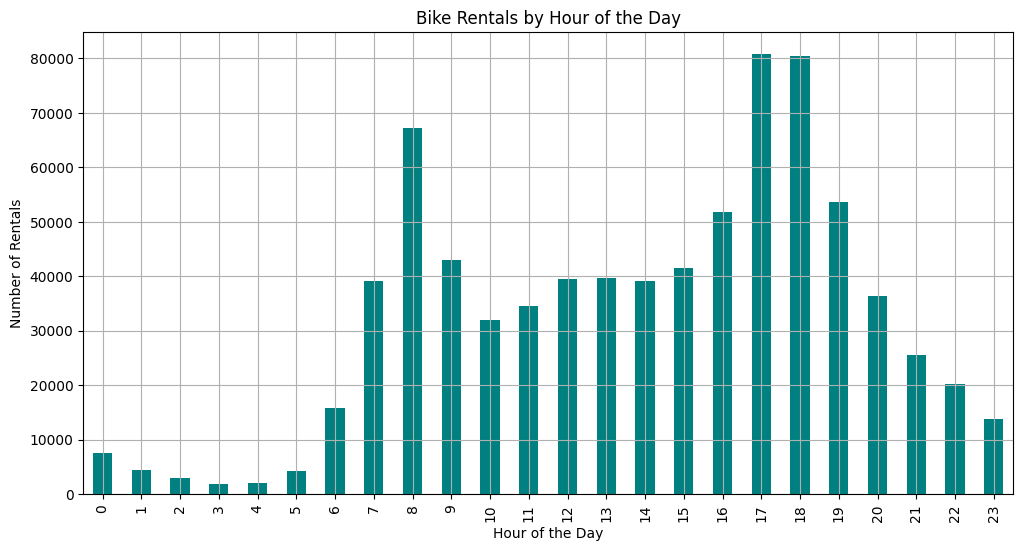

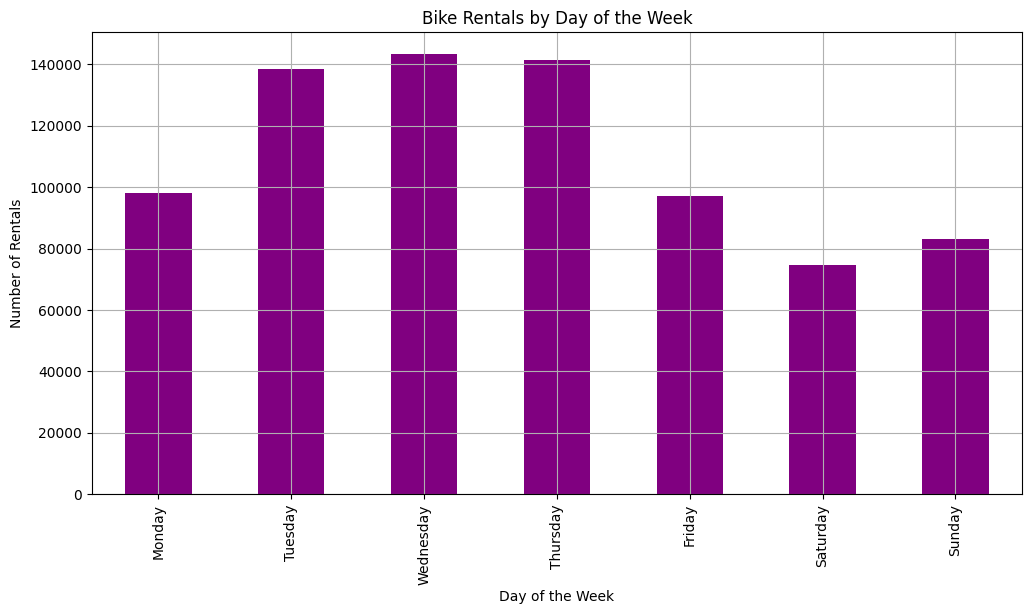

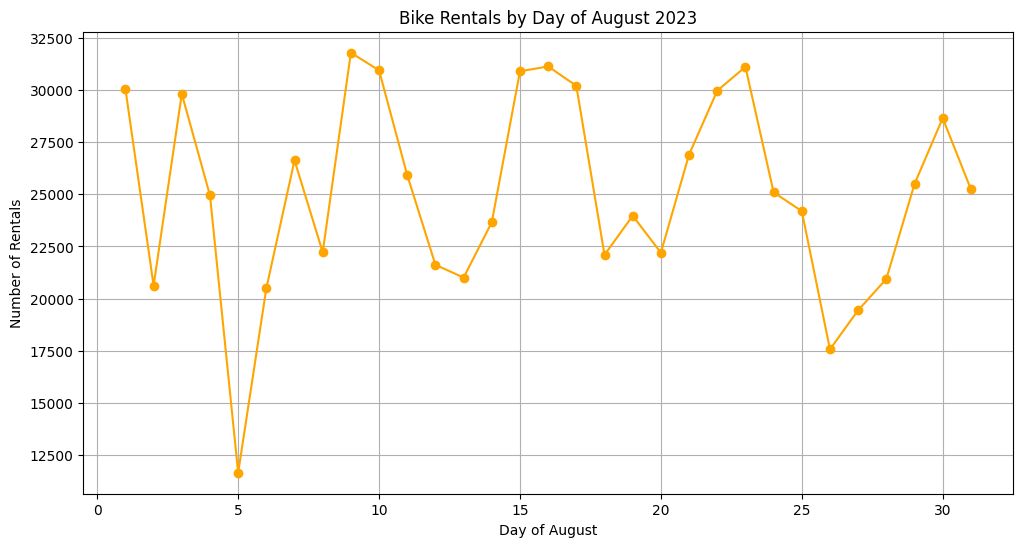

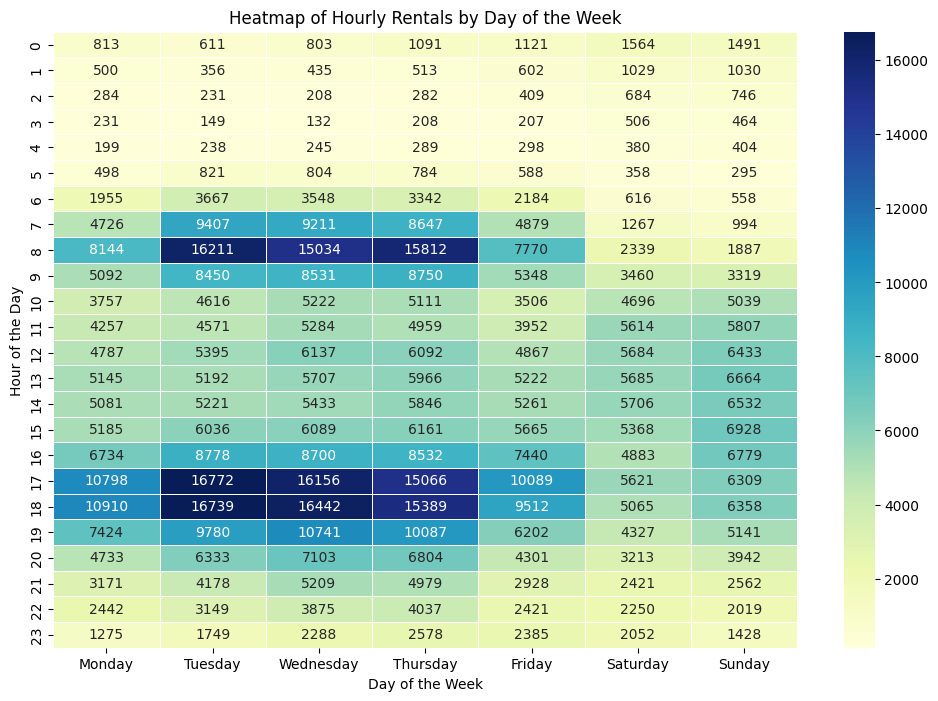

In [ ]:
# Extracting hour, day of the week, and day from the 'Start date'
bike_data['hour'] = bike_data['Start date'].dt.hour
bike_data['day_of_week'] = bike_data['Start date'].dt.day_name()
bike_data['day'] = bike_data['Start date'].dt.day

# Analyzing hourly trends
hourly_counts = bike_data.groupby('hour').size()
plt.figure(figsize=(12, 6))
hourly_counts.plot(kind='bar', color='teal')
plt.title('Bike Rentals by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rentals')
plt.grid(True)
plt.show()

# Analyzing weekly trends
weekly_counts = bike_data.groupby('day_of_week').size().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])
plt.figure(figsize=(12, 6))
weekly_counts.plot(kind='bar', color='purple')
plt.title('Bike Rentals by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Rentals')
plt.grid(True)
plt.show()

# Analyzing daily trends within the month
daily_counts = bike_data.groupby('day').size()
plt.figure(figsize=(12, 6))
daily_counts.plot(kind='line', marker='o', linestyle='-', color='orange')
plt.title('Bike Rentals by Day of August 2023')
plt.xlabel('Day of August')
plt.ylabel('Number of Rentals')
plt.grid(True)
plt.show()

# Heatmap of Hourly Rentals by Day of the Week
pivot_table = bike_data.pivot_table(index='hour', columns='day_of_week', values='Number', aggfunc='count')
pivot_table = pivot_table[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', linewidths=.5, annot=True, fmt=".0f")
plt.title('Heatmap of Hourly Rentals by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of the Day')
plt.show()

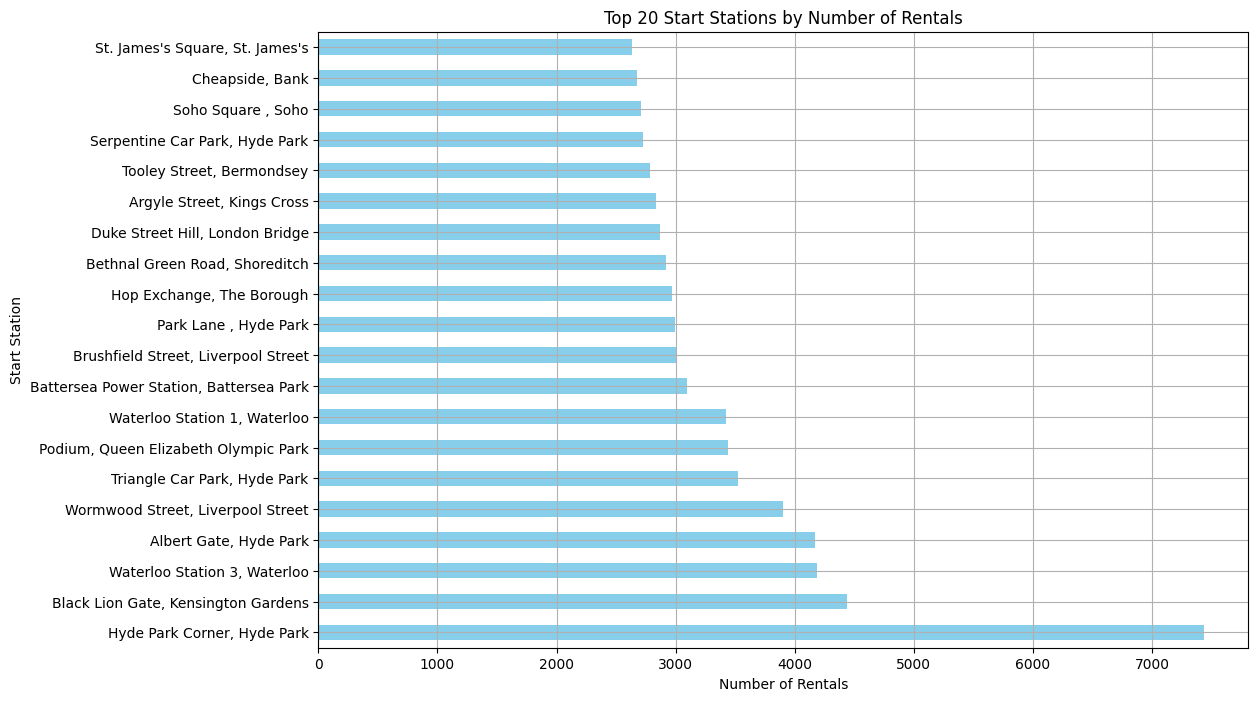

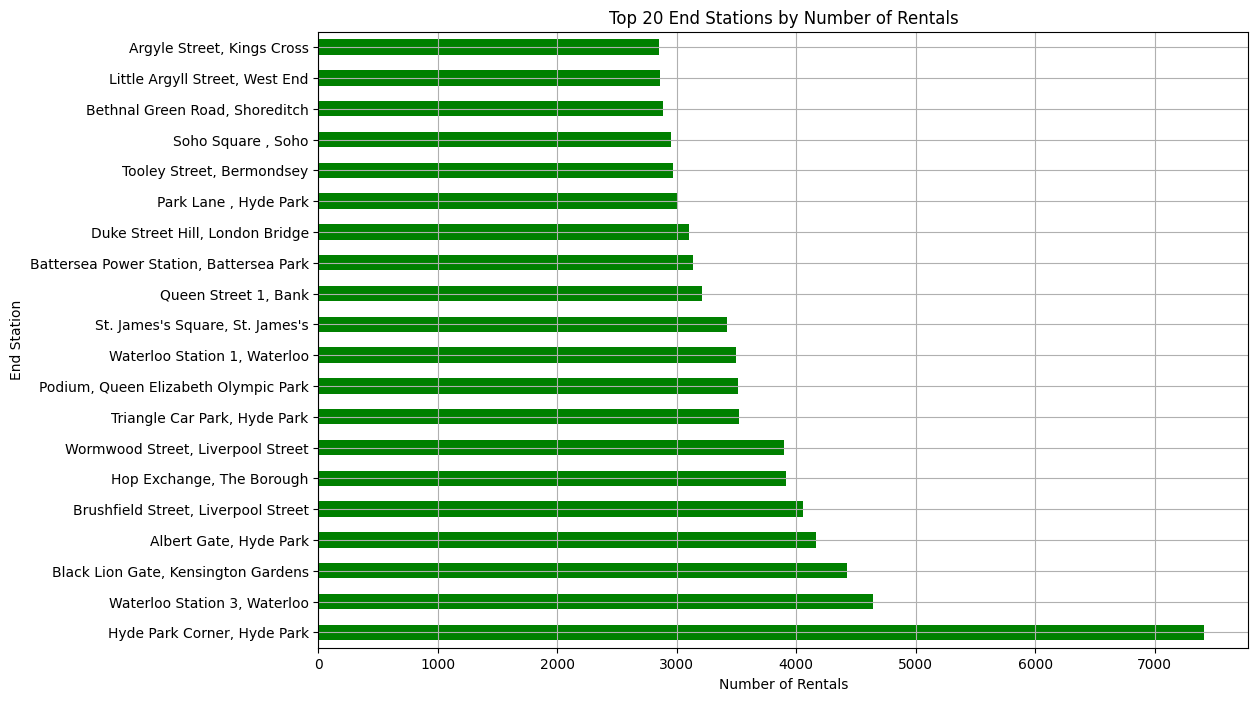

In [ ]:
# Analyze the frequency of bike rentals across different start stations
start_station_counts = bike_data['Start station'].value_counts().head(20)  # Top 20 stations
plt.figure(figsize=(12, 8))
start_station_counts.plot(kind='barh', color='skyblue')
plt.title('Top 20 Start Stations by Number of Rentals')
plt.xlabel('Number of Rentals')
plt.ylabel('Start Station')
plt.grid(True)
plt.show()

# Analyze the frequency of bike rentals across different end stations
end_station_counts = bike_data['End station'].value_counts().head(20)  # Top 20 stations
plt.figure(figsize=(12, 8))
end_station_counts.plot(kind='barh', color='green')
plt.title('Top 20 End Stations by Number of Rentals')
plt.xlabel('Number of Rentals')
plt.ylabel('End Station')
plt.grid(True)
plt.show()


<ipython-input-18-343a76eaa243>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bike_model_counts.index, y=bike_model_counts.values, palette="viridis")


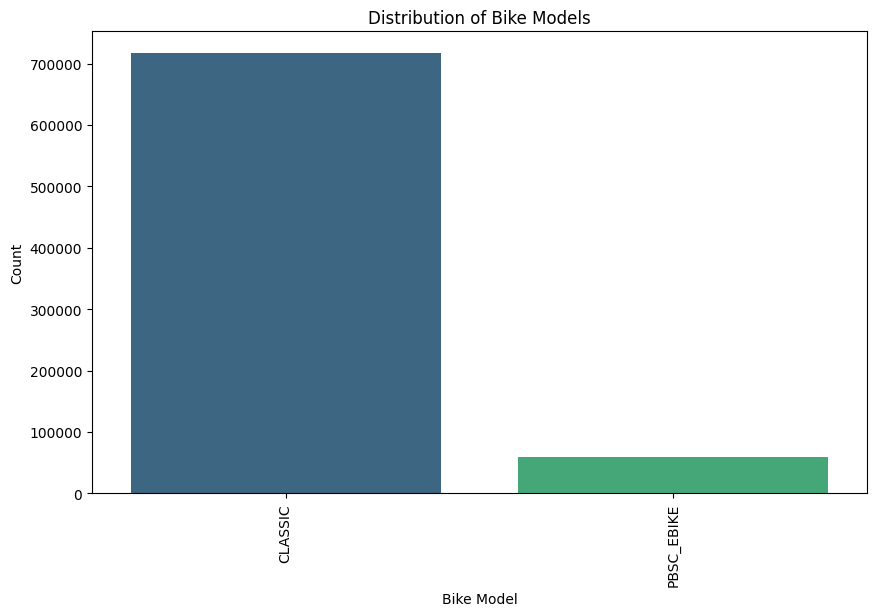

In [ ]:
# Count the occurrences of each bike model
bike_model_counts = bike_data['Bike model'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=bike_model_counts.index, y=bike_model_counts.values, palette="viridis")
plt.title('Distribution of Bike Models')
plt.xlabel('Bike Model')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

Top 10 Most Active Stations:
                           Start station  Total activity
0            Hyde Park Corner, Hyde Park         14851.0
1    Black Lion Gate, Kensington Gardens          8861.0
2           Waterloo Station 3, Waterloo          8826.0
3                 Albert Gate, Hyde Park          8336.0
4      Wormwood Street, Liverpool Street          7800.0
9    Brushfield Street, Liverpool Street          7070.0
5           Triangle Car Park, Hyde Park          7044.0
6   Podium, Queen Elizabeth Olympic Park          6953.0
7           Waterloo Station 1, Waterloo          6918.0
11             Hop Exchange, The Borough          6882.0

Top 10 Least Active Stations:
                                     Start station  Total activity
791                          Sirdar Road, Avondale           358.0
790                 Lansdowne Walk, Ladbroke Grove           344.0
793         Ladbroke Grove Central, Ladbroke Grove           275.0
795  Here East South, Queen Elizabeth Olympic

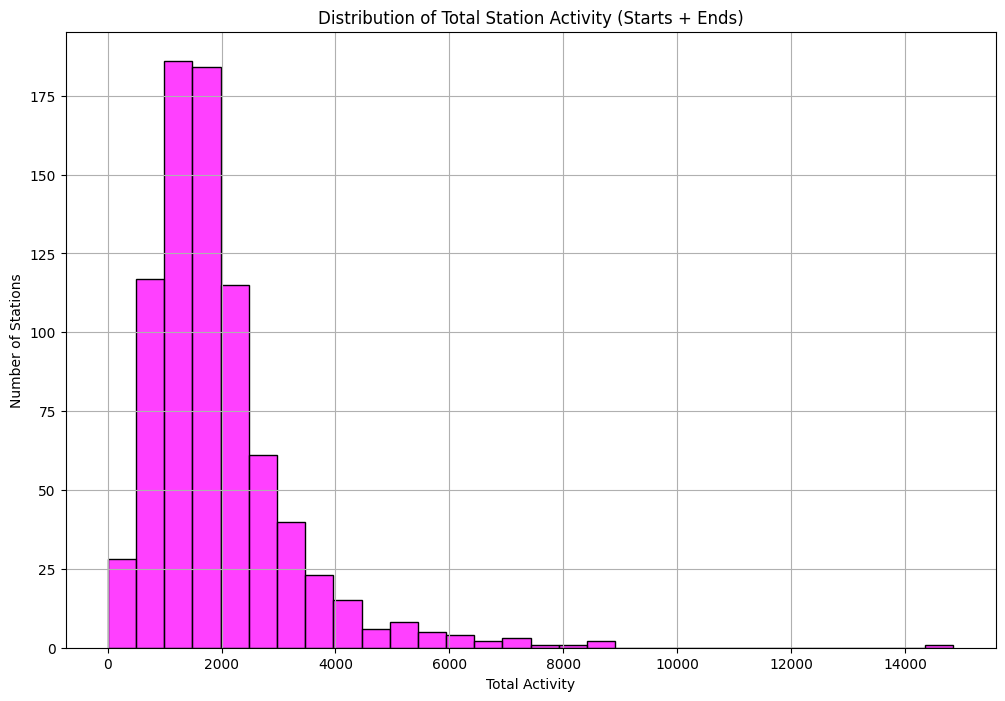

In [ ]:
# Analyzing station usage patterns and identifying factors influencing station popularity

# Calculate the number of trips starting from each station
start_station_usage = bike_data['Start station'].value_counts().reset_index()
start_station_usage.columns = ['Start station', 'Start count']

# Calculate the number of trips ending at each station
end_station_usage = bike_data['End station'].value_counts().reset_index()
end_station_usage.columns = ['End station', 'End count']

# Merge the start and end counts for each station to get a full picture of station activity
station_usage = pd.merge(start_station_usage, end_station_usage, left_on='Start station', right_on='End station', how='outer')
station_usage.fillna(0, inplace=True)  # Fill NaN values which indicate no trips for a station in either start or end counts

# Calculate total activity (sum of starts and ends) at each station
station_usage['Total activity'] = station_usage['Start count'] + station_usage['End count']
# Sort stations by total activity to find the most and least popular stations
station_usage.sort_values(by='Total activity', ascending=False, inplace=True)

# Display the top 10 most active stations
print("Top 10 Most Active Stations:")
print(station_usage[['Start station', 'Total activity']].head(10))

# Display the top 10 least active stations
print("\nTop 10 Least Active Stations:")
print(station_usage[['Start station', 'Total activity']].tail(10))

# Visualize the distribution of station activity
plt.figure(figsize=(12, 8))
sns.histplot(station_usage['Total activity'], bins=30, kde=False, color='magenta')
plt.title('Distribution of Total Station Activity (Starts + Ends)')
plt.xlabel('Total Activity')
plt.ylabel('Number of Stations')
plt.grid(True)
plt.show()

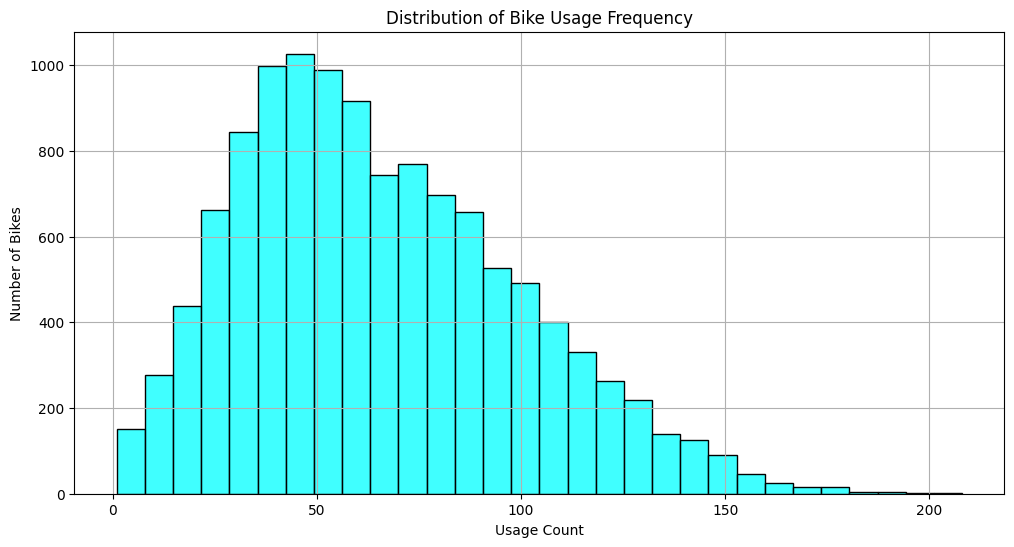

Top 10 Most Used Bikes:
   Bike number  Usage count
0        58819          208
1        59681          197
2        59664          193
3        58836          191
4        59712          188
5        58325          188
6        59479          186
7        59767          185
8        58655          183
9        59352          182

Top 10 Least Used Bikes:
       Bike number  Usage count
11856        52441            1
11857        40305            1
11858        42253            1
11859        14372            1
11860        51601            1
11861        16206            1
11862        52902            1
11863        40573            1
11864        23476            1
11865        51761            1

Station Preferences for Most Used Bikes:

Bike Number: 58819
        Bike number                               Start station  Count
538826        58819         Black Lion Gate, Kensington Gardens      7
538949        58819                       Tower Gardens , Tower      4
538855        5

In [ ]:
# Since the dataset does not contain explicit user IDs or membership types, we cannot directly analyze user-specific behavior.
# However, we can infer some user behavior based on bike usage patterns, such as frequent usage of certain bikes which might suggest regular users.

# Analyzing bike usage frequency to infer potential user behavior
bike_usage_counts = bike_data['Bike number'].value_counts().reset_index()
bike_usage_counts.columns = ['Bike number', 'Usage count']

# Displaying the distribution of bike usage
plt.figure(figsize=(12, 6))
sns.histplot(bike_usage_counts['Usage count'], bins=30, kde=False, color='cyan')
plt.title('Distribution of Bike Usage Frequency')
plt.xlabel('Usage Count')
plt.ylabel('Number of Bikes')
plt.grid(True)
plt.show()

# Identifying the most and least used bikes
print("Top 10 Most Used Bikes:")
print(bike_usage_counts.head(10))
print("\nTop 10 Least Used Bikes:")
print(bike_usage_counts.tail(10))

# Analyzing if certain bikes are predominantly used at specific stations or times, which might suggest targeted user preferences or operational strategies
bike_station_usage = bike_data.groupby(['Bike number', 'Start station']).size().reset_index(name='Count')
most_used_bikes = bike_usage_counts.head(10)['Bike number']

print("\nStation Preferences for Most Used Bikes:")
for bike in most_used_bikes:
    print(f"\nBike Number: {bike}")
    specific_bike_usage = bike_station_usage[bike_station_usage['Bike number'] == bike]
    top_stations = specific_bike_usage.sort_values(by='Count', ascending=False).head(5)
    print(top_stations)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label_encoder = LabelEncoder()
bike_data['Start station encoded'] = label_encoder.fit_transform(bike_data['Start station'])
bike_data['End station encoded'] = label_encoder.fit_transform(bike_data['End station'])
bike_data['Bike model encoded'] = label_encoder.fit_transform(bike_data['Bike model'])
bike_data['day_of_week encoded'] = label_encoder.fit_transform(bike_data['day_of_week'])

# Select features and target for the model
features = ['Start station encoded', 'End station encoded', 'Bike model encoded', 'hour', 'day', 'day_of_week encoded']
target = 'Total duration (s)'

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(bike_data[features], bike_data[target], test_size=0.2, random_state=42)
# Initialize and train the RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Calculate and print performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 638018893.1642994
R^2 Score: -0.013055306610855633


In [ ]:
# Evaluate additional metrics for the Random Forest model
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 1408.2820248150056
